# Abalone Case Study

Problem Statement :
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information :
Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

-----------------------------------------------------------
Name | Data Type | Measurement Unit |  Description


Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/abalone.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Z:\ML Datasets\Abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# EDA

<AxesSubplot:xlabel='Sex', ylabel='count'>

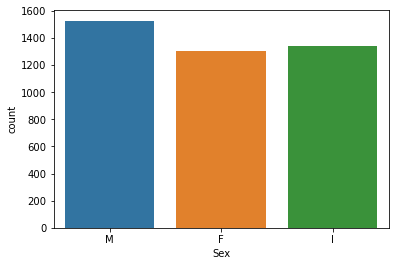

In [7]:
sns.countplot(df['Sex'])

<AxesSubplot:xlabel='Length', ylabel='Rings'>

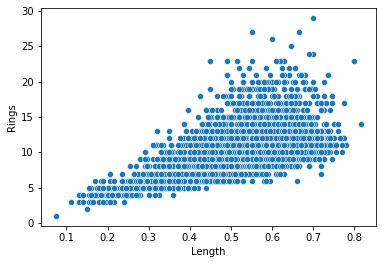

In [8]:
sns.scatterplot(data=df, x='Length', y='Rings')

We can see a positive relationship between the Length and the Rings. The bigger the length, the more the rings and age.

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

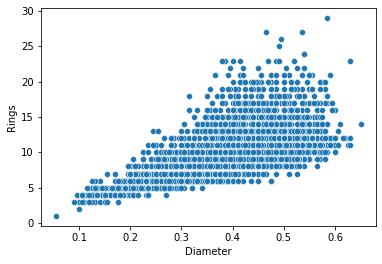

In [9]:
sns.scatterplot(data=df, x='Diameter', y='Rings')

<AxesSubplot:xlabel='Height', ylabel='Rings'>

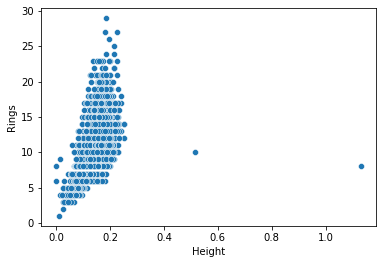

In [10]:
sns.scatterplot(data=df, x="Height", y='Rings')

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

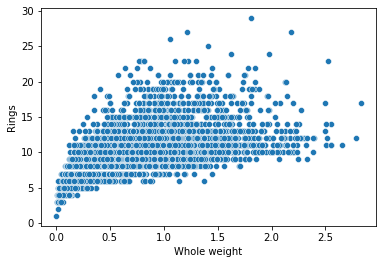

In [11]:
sns.scatterplot(data=df, x="Whole weight", y='Rings')

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

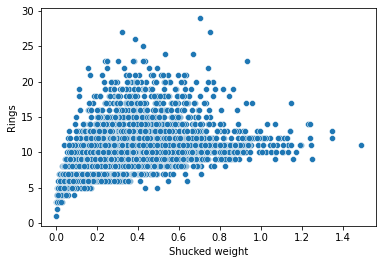

In [12]:
sns.scatterplot(data=df, x="Shucked weight", y='Rings')

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

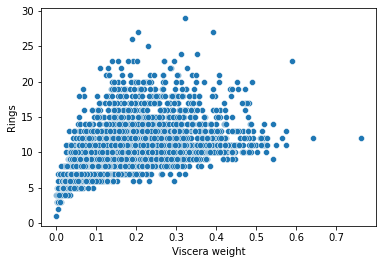

In [13]:
sns.scatterplot(data=df, x="Viscera weight", y='Rings')

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

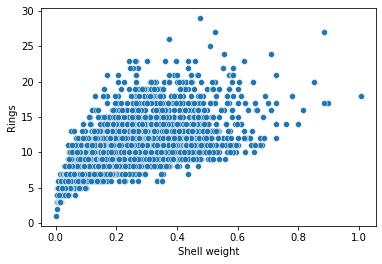

In [14]:
sns.scatterplot(data=df, x="Shell weight", y='Rings')

In [15]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Sex'])
df.drop(['Sex'], axis =1, inplace = True)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Gender
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


In [18]:
#Shifting last column gender to first

cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Correlation :

In [19]:
df.corr()

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Gender,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

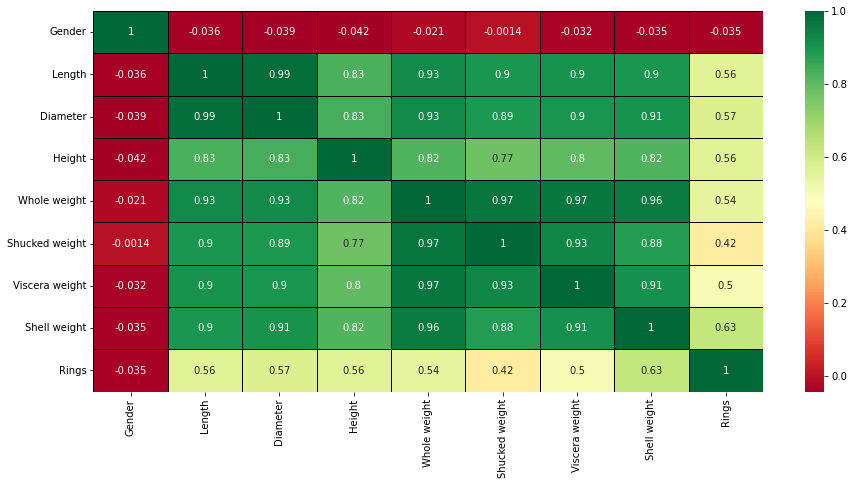

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot =True, linecolor ='black', linewidth = 0.5, cmap = 'RdYlGn')

From the above heatmap we can see that there is a multicolinearity between Diameter and Length & Whole weight and Shucked weight.
We can see that Diameter is contributing more to Rings at 0.57 than that of Length at 0.56.
Same with Whole weight with 0.54 than that of Shucked weight at 0.42.
Also with Shell weight with 0.63 than that of Viscera weight at 0.42.


We must remove the ones that are contributing less than the other.

In [21]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
x = df.drop(["Rings"], axis =1)

In [23]:
def vif_calc():
    vif = pd.DataFrame()
    vif["VIF factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"] = x.columns
    print(vif)

In [24]:
vif_calc()

   VIF factor        features
0    2.555356          Gender
1  700.488988          Length
2  749.121626        Diameter
3   42.128924          Height
4  421.652484    Whole weight
5  101.674946  Shucked weight
6   63.585627  Viscera weight
7   81.873737    Shell weight


We can see the difference here and hence dropping the columns Length, Shucked weight and Viscera weight.

In [25]:
df1 = df.drop(['Length', 'Shucked weight', 'Viscera weight'], axis = 1)
df1

,Gender,Diameter,Height,Whole weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1500,15
1,2,0.265,0.090,0.2255,0.0700,7
2,0,0.420,0.135,0.6770,0.2100,9
3,2,0.365,0.125,0.5160,0.1550,10
4,1,0.255,0.080,0.2050,0.0550,7
...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2490,11
4173,2,0.440,0.135,0.9660,0.2605,10
4174,2,0.475,0.205,1.1760,0.3080,9
4175,0,0.485,0.150,1.0945,0.2960,10


Gender             AxesSubplot(0.125,0.125;0.110714x0.755)
Diameter        AxesSubplot(0.257857,0.125;0.110714x0.755)
Height          AxesSubplot(0.390714,0.125;0.110714x0.755)
Whole weight    AxesSubplot(0.523571,0.125;0.110714x0.755)
Shell weight    AxesSubplot(0.656429,0.125;0.110714x0.755)
Rings           AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

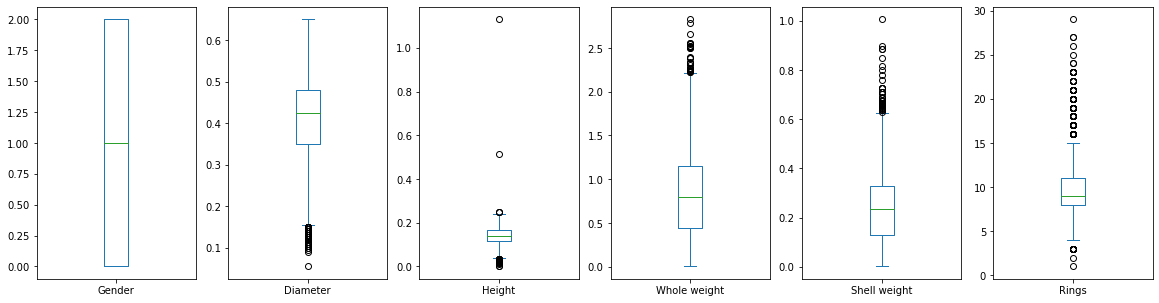

In [26]:
df1.plot(kind = 'box', subplots = True, layout = (1,6), figsize = (20,5))

In [27]:
#Removing outliers using z score

from scipy.stats import zscore
z = np.abs(zscore(df1))
z.shape

(4177, 6)

In [28]:
# threshold=3
print(np.where(z<3))

(array([   0,    0,    0, ..., 4176, 4176, 4176], dtype=int64), array([0, 1, 2, ..., 3, 4, 5], dtype=int64))


In [29]:
df2 = df1[(z<3).all(axis=1)]
print(df1.shape)
print(df2.shape)

(4177, 6)
(4062, 6)


In [30]:
#Percentage of data loss

loss = ((4177-4062)/4177)*100
print(loss)

2.7531721331098877


# Skewness :

In [31]:
df1.skew()

# data been (-0.5) and (0.5) is normalized

Gender         -0.098155
Diameter       -0.609198
Height          3.128817
Whole weight    0.530959
Shell weight    0.620927
Rings           1.114102
dtype: float64

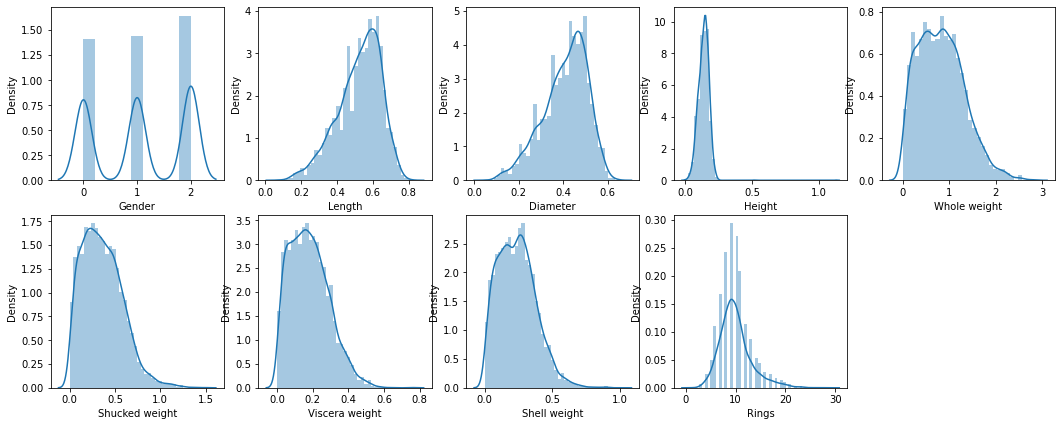

In [32]:
plt.figure(figsize=(18,7))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2,5,i)
    sns.distplot(df[column])

# Transforming data to remove skewness

In [33]:
df2.describe()

,Gender,Diameter,Height,Whole weight,Shell weight,Rings
count,4062.000000,4062.000000,4062.000000,4062.000000,4062.000000,4062.000000
mean,1.053422,0.406251,0.138391,0.812147,0.232656,9.745938
std,0.819218,0.096941,0.037334,0.469350,0.130140,2.863031
min,0.000000,0.115000,0.015000,0.014500,0.005000,3.000000
25%,0.000000,0.345000,0.115000,0.438625,0.129000,8.000000
50%,1.000000,0.420000,0.140000,0.789500,0.228750,9.000000
75%,2.000000,0.480000,0.165000,1.136375,0.320000,11.000000
max,2.000000,0.605000,0.250000,2.273000,0.655000,19.000000


In [34]:
X = df2.drop(['Rings'], axis = 1)
Y = df2["Rings"]

In [35]:
from sklearn.preprocessing import power_transform
df3 = power_transform(df2, method ='yeo-johnson')
df3

array([[ 1.1309993 , -0.54551214, -1.15553462, -0.57282166, -0.58973717,
         1.67383699],
       [ 1.1309993 , -1.39747313, -1.27585799, -1.35326183, -1.33154823,
        -0.98033825],
       [-1.31308688,  0.02731912, -0.1366881 , -0.18650182, -0.08874955,
        -0.1641571 ],
       ...,
       [ 1.1309993 ,  0.68420296,  1.90199707,  0.82443382,  0.64437773,
        -0.1641571 ],
       [-1.31308688,  0.81332294,  0.27199771,  0.67383608,  0.55970319,
         0.19526433],
       [ 1.1309993 ,  1.80730124,  1.58979418,  2.05377209,  1.81208874,
         0.84133989]])

# Scaling data

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df3)
df3

array([[ 1.1309993 , -0.54551214, -1.15553462, -0.57282166, -0.58973717,
         1.67383699],
       [ 1.1309993 , -1.39747313, -1.27585799, -1.35326183, -1.33154823,
        -0.98033825],
       [-1.31308688,  0.02731912, -0.1366881 , -0.18650182, -0.08874955,
        -0.1641571 ],
       ...,
       [ 1.1309993 ,  0.68420296,  1.90199707,  0.82443382,  0.64437773,
        -0.1641571 ],
       [-1.31308688,  0.81332294,  0.27199771,  0.67383608,  0.55970319,
         0.19526433],
       [ 1.1309993 ,  1.80730124,  1.58979418,  2.05377209,  1.81208874,
         0.84133989]])

In [37]:
df4 = pd.DataFrame(df3)

# Train Test Split 

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
#importing accuracy metrics
from sklearn import metrics
from sklearn.metrics import r2_score

#Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

#improting required metrices

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))

MAE: 0.2951888254286497
MSE: 0.19189576576319625
RMSE: 0.4380590893511927
r2score: 0.9788348506590756


In [40]:
#DecisionTree Regressor model

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
pred=dtr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))

MAE: 0.0
MSE: 0.0
RMSE: 0.0
r2score: 1.0


In [41]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,Y_train)
pred=rdr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))

MAE: 0.0
MSE: 0.0
RMSE: 0.0
r2score: 1.0


In [42]:
#Support Vector Regressor model

from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,Y_train)
pred=svr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))

MAE: 0.09012322727682263
MSE: 0.03131682666771727
RMSE: 0.1769656087145671
r2score: 0.9965459096469902


In [43]:
# KNN

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))

MAE: 0.15282902829028291
MSE: 0.10739544895448955
RMSE: 0.3277124485802905
r2score: 0.9881548156801835


# HyperParamameter Tuning :

# RandomizedSearchCV

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
#use any value below

criterion = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
max_depth = range(43, 4000, 10)
min_samples_split = range(35, 4100, 10)
min_samples_leaf  = [10, 185, 303, 420]
max_features =['auto', 'sqrt', 'log2'] 

random_grid =  {"criterion" : criterion,
               "max_features" : max_features,
               "max_depth" : max_depth,
                "min_samples_split" : min_samples_split,
                "min_samples_leaf" : min_samples_leaf,}
print(random_grid)

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': range(43, 4000, 10), 'min_samples_split': range(35, 4100, 10), 'min_samples_leaf': [10, 185, 303, 420]}


In [46]:
dt = DecisionTreeRegressor()
rscv = RandomizedSearchCV(estimator = dt, 
                          param_distributions= random_grid, 
                          cv = 5, 
                          verbose = 2, 
                          random_state=200, 
                          n_jobs = -1)

#fitting
rscv.fit(X_train, Y_train)
rscv

#no. of cv = that many times the train and test will be splitted
#n_jobs = -1 means use all cores of my machine

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': range(43, 4000, 10),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 185, 303, 420],
                                        'min_samples_split': range(35, 4100, 10)},
                   random_state=200, verbose=2)

In [47]:
rscv.best_params_

{'min_samples_split': 1035,
 'min_samples_leaf': 420,
 'max_features': 'auto',
 'max_depth': 203,
 'criterion': 'friedman_mse'}

In [48]:
rscv.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=203,
                      max_features='auto', min_samples_leaf=420,
                      min_samples_split=1035)

In [49]:
best_rscv = rscv.best_estimator_

In [50]:
pred = best_rscv.predict(X_test)

In [51]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))

MAE: 0.6620493269415408
MSE: 0.9417587589029014
RMSE: 0.970442558270659
r2score: 0.8961286889472034


# GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
gridcv_grid = {"max_features" : [rscv.best_params_['max_features']],
               
               "max_depth" : [rscv.best_params_['max_depth']],
               
               "min_samples_split" :  [rscv.best_params_['min_samples_split'],
                                       rscv.best_params_['min_samples_split']+2,
                                       rscv.best_params_['min_samples_split']+4,
                                       rscv.best_params_['min_samples_split']+6],
               
               "min_samples_leaf" : [rscv.best_params_['min_samples_leaf'],
                                     rscv.best_params_['min_samples_leaf']+2,
                                     rscv.best_params_['min_samples_leaf']+4,
                                     rscv.best_params_['min_samples_leaf']+6],
               
               "criterion" :[rscv.best_params_['criterion']]}

print(gridcv_grid)

{'max_features': ['auto'], 'max_depth': [203], 'min_samples_split': [1035, 1037, 1039, 1041], 'min_samples_leaf': [420, 422, 424, 426], 'criterion': ['friedman_mse']}


In GridSearchCV we don't have an option of iteration, so many iterations will it and how do we know it?
Check the output of the above column and count the outputs of each parmater and multiply them. 

-> 4 x 1 x 1 x 4 x 4 x 1 = 16

In [54]:
gridcv = GridSearchCV(estimator = dt, 
                          param_grid= gridcv_grid, 
                          cv = 5, 
                          verbose = 2, 
                          n_jobs = -1)

#fitting
gridcv.fit(X_train, Y_train)
gridcv

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'], 'max_depth': [203],
                         'max_features': ['auto'],
                         'min_samples_leaf': [420, 422, 424, 426],
                         'min_samples_split': [1035, 1037, 1039, 1041]},
             verbose=2)

In [55]:
gridcv.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=203,
                      max_features='auto', min_samples_leaf=420,
                      min_samples_split=1035)

In [56]:
best_grid = gridcv.best_estimator_

In [57]:
pred = best_grid.predict(X_test)

In [58]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))

MAE: 0.6620493269415408
MSE: 0.9417587589029014
RMSE: 0.970442558270659
r2score: 0.8961286889472034


# Cross Validation :

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
#We are not taking the X_train and Y_train here but giving it whole dataset and internally it will perform its mechanism.
#cv is the number of times train test split that will acutally happen and the same no. of result will be produced, mean will 

cvs = cross_val_score(dt, X, Y, cv=10)
cvs.mean()

1.0

In [61]:
import pickle
filename = 'Abalone Age Prediction.pkl'
pickle.dump(dt, open(filename, 'wb'))